- GitHub: https://github.com/mahmood1989?tab=repositories
- Email: mahmoodr@ualberta.ca

## Classification of animal images using transfer learning in MobileNet

### Import python libraries

In [1]:
import numpy as np

import pandas as pd

import cv2
import glob
import pathlib
from tkinter import *
from tkinter import filedialog
import os

import matplotlib.pylab as plt

import json

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Import Mobilenet model from TensorFlow Hub

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

### Load animal dataset from Kaggle
You can download the animal images from:
https://www.kaggle.com/datasets/sharansmenon/animals141 

There are 151 animal types in the original dataset from Kaggle. 
I just used the first 50 animal types (sorted by name) for training my model.

In [3]:
data_dir = '.\\Animals'

In [4]:
import PIL.Image as Image

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('Animals')

In total, there are 2,165 photos from 50 animal types.

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

2165

Here is a photo of cheetah with the scientific name as acinonyx jubatus.

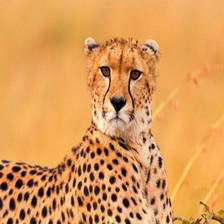

In [7]:
acinonyx_jubatus = list(data_dir.glob('acinonyx-jubatus/*.jpg'))
Image.open(acinonyx_jubatus[23])

### Building a dataframe of animal names

Note that each animal has a scientific name and also a commonly used name in the following table.

In [8]:
folders = os.listdir(data_dir)

In [9]:
animals_table = pd.DataFrame()

In [10]:
animals_table['scientific names'] = folders

In [11]:
json_file = open('Animal_names.json')
scientific_to_real = json.load(json_file) 

In [12]:
animals_table['commmon names'] = [scientific_to_real[i] for i in folders]

In [13]:
animals_table

,scientific names,commmon names
0,acinonyx-jubatus,Cheetah
1,aethia-cristatella,Crested Auklet
2,agalychnis-callidryas,Tree Frog
3,agkistrodon-contortrix,Eastern Copperhead
4,ailuropoda-melanoleuca,Giant Panda
5,ailurus-fulgens,Red Panda
6,alces-alces,Moose
7,anas-platyrhynchos,Mallard
8,ankylosaurus-magniventris,Ankylosaurus
9,apis-mellifera,Western Honey Bee


### Covert images to Numpy arrays

We make a dictionary to assign a name to each image in a folder.

In [14]:
animals_image_dict = {}

for ii in folders:
    animals_image_dict[ii] = list(data_dir.glob(ii + '/*.jpg'))

We make a dictionary to assign a class number to each image. 

In [15]:
animals_labels_dict = {}

counter = -1
for ii in folders:
    counter += 1 
    animals_labels_dict[ii] = counter

This dictionary is similar to the previous one. However, we replaced 'key' and 'value' in this dictionary.

In [16]:
find_animal_keys = {}

counter = -1
for ii in folders:
    counter += 1 
    find_animal_keys[counter] = ii

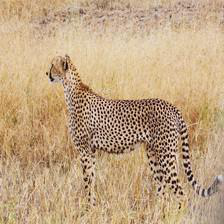

In [17]:
Image.open(animals_image_dict['acinonyx-jubatus'][20])

In this part we change the size of images to 224-224-3 because MobileNet model works with this size of image. After than we convert X and y to numpy arrays. 

In [18]:
X, y = [], []

for animal_name, images in animals_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(animals_labels_dict[animal_name])

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
X.shape

(2165, 224, 224, 3)

In [21]:
y.shape

(2165,)

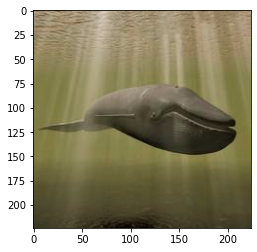

In [22]:
plt.imshow(X[652])

### Split data into training and test sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train_scaled = []
X_test_scaled = []

for ii in X_train:
    X_train_scaled.append(ii/255)

for ii in X_test:
    X_test_scaled.append(ii/255)

In [25]:
X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)

In [26]:
X_train_scaled.shape

(1732, 224, 224, 3)

In [27]:
X_test_scaled.shape

(433, 224, 224, 3)

### Import Mobilenet layers from TensorFlow Hub

In [28]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [29]:
## trainable=False ==>> Freeze all layers and do not train the model 
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

We freeze all layers of the MobileNet and we just add one dense layers with 50 neurons to the end of this model. 

As a result, there are only 64,050 parameters that should be trained.

In [30]:
num_of_animals = 50

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_animals)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 50)                64050     
                                                                 
Total params: 2,322,034
Trainable params: 64,050
Non-trainable params: 2,257,984
_________________________________________________________________


In [31]:
model.compile(
    optimizer = 'Adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
55/55 [==============================] - 223s 4s/step - loss: 2.3625 - acc: 0.4688
Epoch 2/5
55/55 [==============================] - 217s 4s/step - loss: 0.5685 - acc: 0.9042
Epoch 3/5
55/55 [==============================] - 219s 4s/step - loss: 0.3000 - acc: 0.9532
Epoch 4/5
55/55 [==============================] - 216s 4s/step - loss: 0.1844 - acc: 0.9850
Epoch 5/5
55/55 [==============================] - 242s 4s/step - loss: 0.1260 - acc: 0.9925


The model accuracy on test data is 0.91 which is very good.

In [32]:
model.evaluate(X_test_scaled, y_test)

14/14 [==============================] - 48s 3s/step - loss: 0.3567 - acc: 0.9169


[0.35674798488616943, 0.9168591499328613]

In [33]:
y_predicted = model.predict(X_test_scaled)

In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Let's see how MobileNet works on test data. To do this we define the following function.

In [35]:
def test_model(num):
    if num > (len(X_test) - 1):
        print('The index should be smaller than', len(X_test))
    
    plt.imshow(X_test[num])
    print('The real scientific name is '+ find_animal_keys[y_test[num]]+'.')
    print('Our model gives the scientific name as '+ find_animal_keys[y_predicted_labels[num]]+'.\n')
    print('The commonly used name of this animal (based on model) is '+ scientific_to_real[find_animal_keys[y_predicted_labels[num]]]+'.')

The real scientific name is aptenodytes-forsteri.
Our model gives the scientific name as aptenodytes-forsteri.

The commonly used name of this animal (based on model) is Emperor Penguin.


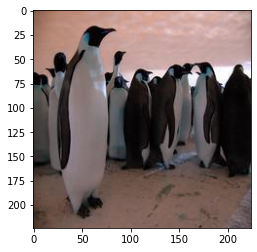

In [36]:
test_model(1)

The real scientific name is circus-hudsonius.
Our model gives the scientific name as circus-hudsonius.

The commonly used name of this animal (based on model) is Northern Harrier.


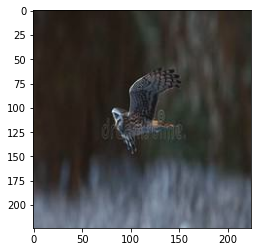

In [37]:
test_model(99)

The real scientific name is ardea-herodias.
Our model gives the scientific name as ardea-herodias.

The commonly used name of this animal (based on model) is Great Blue Heron.


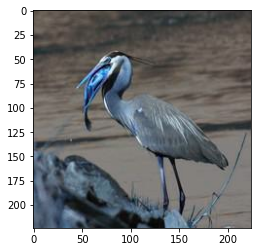

In [38]:
test_model(202)

The real scientific name is acinonyx-jubatus.
Our model gives the scientific name as acinonyx-jubatus.

The commonly used name of this animal (based on model) is Cheetah.


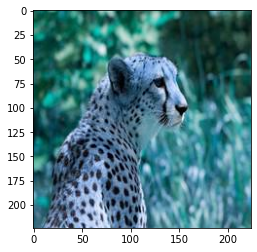

In [39]:
test_model(299)

Text(114.0, 0.5, 'Truth')

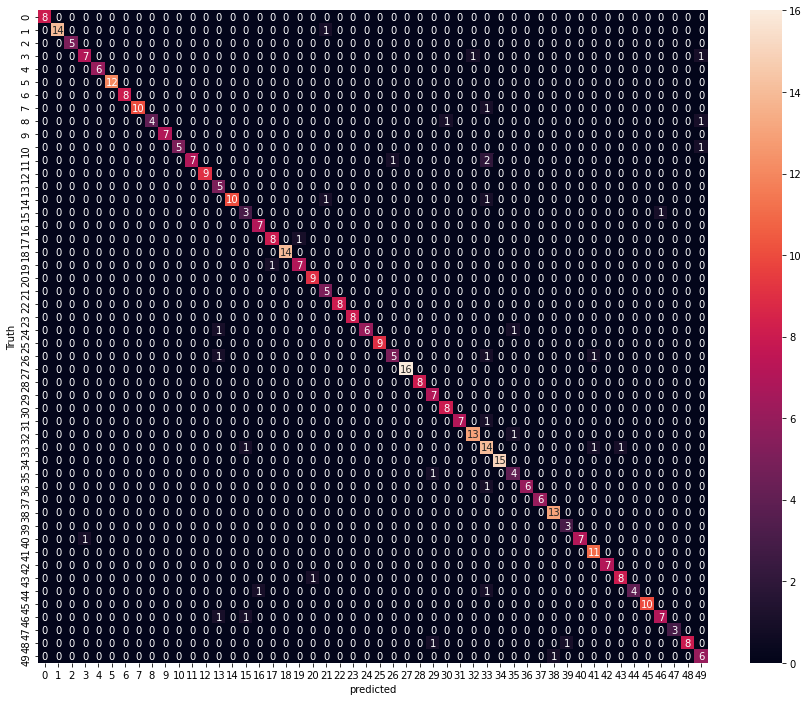

In [43]:
# Let's visualize this confusion matrix in seaborn
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize = (15, 12))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel ('predicted')
plt.ylabel('Truth')

### Let's choose some photos from internet and check the performance of the model

In [53]:
def openFile():
    filepath = filedialog.askopenfilename(initialdir="C:/Users/Reza/Desktop/Deep Learning Projects/Project 5 - Animal detection using MobileNet/Internet_photos",
                                          title="Choose your image in *.jpg format",
                                          filetypes= (("text files","*.jpg"),
                                          ("all files","*.*")))
    
    
    X_test_scaled0 = []    
    img = cv2.imread(filepath)
    img_resized = cv2.resize(img, (224, 224))
    X_test_scaled0.append(img_resized)
    X_test_scaled0 = np.array(X_test_scaled0) / 255
    
    y_predicted0 = model.predict(X_test_scaled0)
    y_predicted_labels0 = np.argmax(y_predicted0)
    
    
    print('Our model gives the scientific name as '+ find_animal_keys[y_predicted_labels0]+'.')
    print('The commonly used name of this animal is '+ scientific_to_real[find_animal_keys[y_predicted_labels0]]+'.')
    
    return(plt.imshow(img_resized))

Our model gives the scientific name as branta-canadensis.
The commonly used name of this animal is Canada Goose.


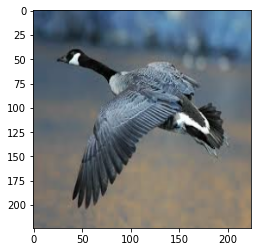

In [54]:
openFile()

Our model gives the scientific name as anas-platyrhynchos.
The commonly used name of this animal is Mallard.


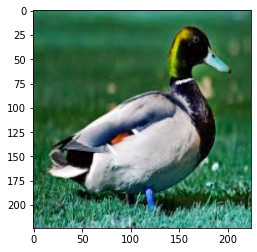

In [55]:
openFile()

Our model gives the scientific name as agalychnis-callidryas.
The commonly used name of this animal is Tree Frog.


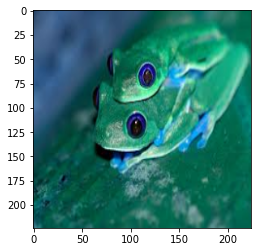

In [56]:
openFile()

Our model gives the scientific name as dendrobatidae.
The commonly used name of this animal is Poison Dart Frog.


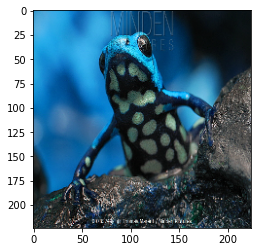

In [57]:
openFile()

Our model gives the scientific name as bradypus-variegatus.
The commonly used name of this animal is Brown-throated Three-toed Sloth.


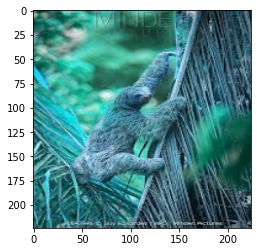

In [58]:
openFile()

Our model gives the scientific name as betta-splendens.
The commonly used name of this animal is Siamese Fighting Fish.


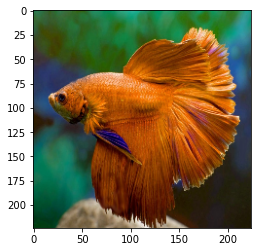

In [59]:
openFile()

Our model gives the scientific name as correlophus-ciliatus.
The commonly used name of this animal is Crested Giant Gecko.


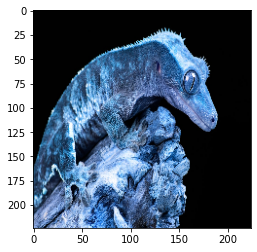

In [60]:
openFile()

Our model gives the scientific name as desmodus-rotundus.
The commonly used name of this animal is Vampire Bat.


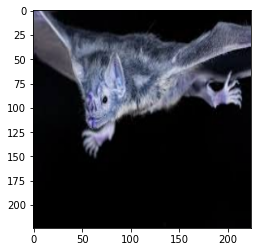

In [61]:
openFile()